In [7]:
using DataFrames
using CSV
using TravelingSalesmanHeuristics

In [8]:
#WPrzemysław Szufel, orkshop on Optimziation Techniques for Data Science
# in Python and Julia, Fields Institute
distance_data = CSV.read("distance_UofT.csv", header=[:i, :j, :dist]);
N = length(unique(distance_data.i))
const distance_mx = zeros(Float64,(N,N))
for r in 1:nrow(distance_data)
   distance_mx[distance_data.i[r],distance_data.j[r]] = distance_data.dist[r]
end

In [9]:
sol = TravelingSalesmanHeuristics.solve_tsp(distance_mx,quality_factor =100)

([3, 1, 2, 5, 4, 3], 18.0)

In [10]:
POI_gps = CSV.read("UofT.csv");

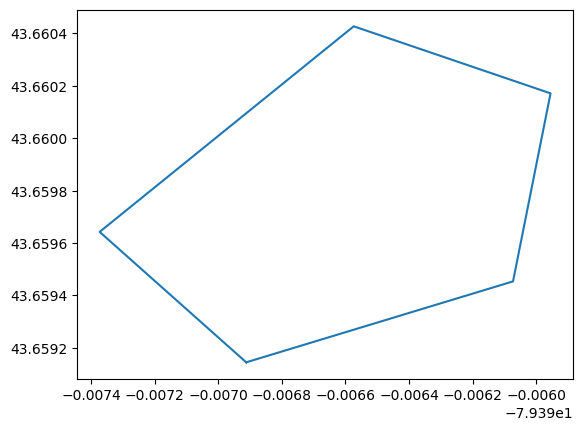

In [11]:
using PyPlot
ids = sol[1]
PyPlot.cla()
PyPlot.ioff()
PyPlot.plot(POI_gps.long[ids], POI_gps.latt[ids])
PyPlot.display_figs()
PyPlot.show()

In [12]:
#required installation for map vizualiztion
#using Conda
#Conda.runconda(`install folium -c conda-forge`)
using PyCall
flm = pyimport("folium")

n=length(ids)

m = flm.Map(location=[POI_gps.latt[1],POI_gps.long[1]], zoom_start=18)

# m = flm.Map(location=[POI_gps.latt[1],POI_gps.long[1]])

for i in ids
    flm.CircleMarker(location=[POI_gps.latt[i], POI_gps.long[i]],radius = 10,color="crimson").add_to(m)
end

for k in ids
    flm.PolyLine([[POI_gps.latt[getindex(ids, k)], POI_gps.long[getindex(ids, k)]],[POI_gps.latt[getindex(ids, k+1)], POI_gps.long[getindex(ids, k+1)]]]
).add_to(m)
end

m

PyObject <folium.folium.Map object at 0x0000000045EBEDA0>